### Установка и загрузка необходимых модулей

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from sklearn.model_selection import train_test_split

from google.colab import drive


##**Задание 1.** 
Загрузите из датасета по ссылке ниже базу цифр MNIST, а также базу для тестирования. С помощью методов, изученных в занятиях по работе с таблицами Pandas, Анализ и обработка данных, и данном занятии, обработайте датасет и подайте в нейронную сеть, постаравшись добиться максимальной точности распознавания. Для улучшения обучения можно использовать также дополнительные методы, не рассмотренные в занятиях, слои, функции активации, менять параметры оптимизатора Adam и прочие гиперпараметры. Результаты рекомендуется заносить в таблицу для себя, чтобы можно было потом воспроизвести лучший вариант. Предсказание Вашей сети необходимо отправить в виде специального файла с расширением csv, чтобы войти в рейтинговую таблицу соревнования. Следуйте коду в ноутбуке 
для создания ответа. Ответ можно улучшить и подавать результат несколько раз. 



Описание: Файлы данных этого датасета - train.csv и test.csv - содержат полутоновые изображения нарисованных от руки цифр от нуля до девяти.

Каждое изображение имеет 28 пикселей в высоту и 28 пикселей в ширину, всего 784 пикселя. Каждый пиксель имеет одно связанное с ним значение пикселя, указывающее яркость или темноту этого пикселя, причем более низкие числа означают более темный. Это значение пикселя представляет собой целое число от 0 до 255 включительно.

Набор обучающих данных (train.csv) содержит 785 столбцов. Первый столбец, называемый «метка» (label), - это цифра, нарисованная пользователем. Остальные столбцы содержат значения пикселей связанного изображения.

Каждый столбец пикселей в обучающем наборе имеет имя, например pixelx, где x - целое число от 0 до 783 включительно. Чтобы найти этот пиксель на изображении, предположим, что мы разложили x как x = i * 28 + j, где i и j - целые числа от 0 до 27 включительно. Тогда pixelx расположен в строке i и столбце j матрицы 28 x 28 (индексирование нулем).

Например, pixel31 указывает пиксель, который находится в четвертом столбце слева и во второй строке сверху, как на ascii-диаграмме ниже.

Визуально, если мы опускаем префикс «пиксель», пиксели составляют изображение следующим образом:

000 001 002 003 ... 026 027

028 029 030 031 ... 054 055

056 057 058 059 ... 082 083

 |   |   |   |  ...  |   |

728 729 730 731 ... 754 755

756 757 758 759 ... 782 783

Набор тестовых данных (test.csv) такой же, как обучающий набор, за исключением того, что он не содержит столбца «метка».

Ваш файл отправки должен быть в следующем формате: для каждого из 28000 изображений в тестовом наборе выведите одну строку, содержащую ImageId и прогнозируемую цифру. Например, если вы предсказываете, что первое изображение имеет 3, второе изображение - 7, а третье изображение - 8, то ваш файл отправки будет выглядеть так:

ImageId,Label

1,3

2,7

3,8
 
(ещё 27997 строк)

Метрика оценки для этого конкурса - точность категоризации или доля тестовых изображений, которые правильно классифицированы. Например, точность категоризации 0,97 означает, что вы правильно классифицировали все изображения, кроме 3%.

##Решение

#### Создаём правильную папку для ключа Каггл

In [ ]:
!mkdir /root/.kaggle # создаём папку ~/.kaggle для ключа kaggle в Колабе, она должна быть такой по требованию Каггл

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# переходим в папку, теперь это путь по умолчанию
%cd /root/.kaggle 

/root/.kaggle


In [ ]:
#запускаем - подключаем Google Drive - будем скачивать с него, т.к. намного быстрее
#после запуска переходим по ссылке, которая появится, для идентификации
#копируем оттуда код authorization code и вставляем здесь в окошко
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# копируем ключ с Google Drive в созданную выше папку, предварительно её создав:
!cp '/content/drive/My Drive/datasets/kaggle/kaggle.json' '/root/.kaggle/kaggle.json'

cp: cannot stat '/content/drive/My Drive/datasets/kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle --version

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!ls

###Подключаемся к системе соревнований, скачиваем датасет

In [ ]:
!kaggle competitions download -c digit-recognizer # скачиваем датасет и тестовые данные

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!ls

###Разархивируем датасет

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = mnist.load_data()



11490434/11490434 [==============================] - 1s 0us/step


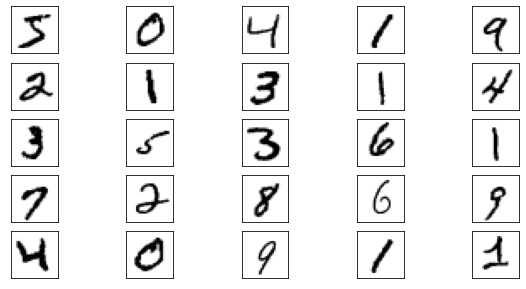

In [ ]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
 
plt.show()


###Разделяем данные и метки

In [ ]:
x_train ,x_test , y_train ,  y_test = train_test_split(x_train,y_train,test_size=0.3,random_state = 33)

In [ ]:
print("X train shape: ",x_train.shape)
print("Y train shape: ",y_train.shape)
print("X test shape: ",x_test.shape)
print("Y test shape: ",y_test.shape)

X train shape:  (42000, 28, 28)
Y train shape:  (42000,)
X test shape:  (18000, 28, 28)
Y test shape:  (18000,)


###Создаём сеть, компилируем, обучаем

In [ ]:
model = Sequential([
    Flatten(),
    Dense(820,activation="relu"),
    Dense(410,activation="relu"),
    Dense(10,activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=40)

Epoch 1/40
1313/1313 [==============================] - 4s 3ms/step - loss: 1.8717 - accuracy: 0.8972
Epoch 2/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2260 - accuracy: 0.9428
Epoch 3/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1801 - accuracy: 0.9529
Epoch 4/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1695 - accuracy: 0.9563
Epoch 5/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1409 - accuracy: 0.9620
Epoch 6/40
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1378 - accuracy: 0.9647
Epoch 7/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1276 - accuracy: 0.9682
Epoch 8/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1130 - accuracy: 0.9723
Epoch 9/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1058 - accuracy: 0.9743
Epoch 10/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.106

###Делаем предсказания моделью

In [ ]:
model.evaluate(x_test,y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.4644 - accuracy: 0.9638


[0.46437403559684753, 0.9637777805328369]

In [ ]:
y_pred = model.predict(x_test)
y = []
for i in range(0,len(y_pred)):
    prob = y.append(np.argmax(list(y_pred[i])))

563/563 [==============================] - 1s 2ms/step


In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

###Переводим ответ в правильный формат, отсылаем для подсчёта рейтинга

In [ ]:
submission = pd.DataFrame({"ImageId":range(1,len(y_pred)+1),"Label":y})
submission.head()

,ImageId,Label
0,1,6
1,2,2
2,3,8
3,4,2
4,5,1


In [ ]:
submission = submission.to_csv('./submission.csv',index=False,header=True)#,encoding='utf-8'

In [ ]:
!ls

submission.csv


###Переходим по ссылке, чтобы увидеть таблицу лидеров.

https://www.kaggle.com/c/udt3/leaderboard